### Backgroud:
A human resourse company is doing market reasearch to decide which sized companies should they target and which countries are their potentail market.
### Questions:
1. which sized compnies can be their have the biggeest proportion? 
2. which sized compnies can be their clients?
3. which countries have the biggeest markets?
4. they are interested in targeting tech companies, they want which countries have the most numbers of tech companies.
    

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('12_million_plus_company_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787000 entries, 0 to 12786999
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   website                    object 
 2   industry                   object 
 3   size_range                 object 
 4   current_employee_estimate  float64
 5   total_employee_estimate    float64
 6   country                    object 
 7   locality                   object 
 8   region                     object 
 9   year_founded               float64
 10  linkedin_url               object 
dtypes: float64(3), object(8)
memory usage: 1.0+ GB


In [4]:
df.head(3)

,name,website,industry,size_range,current_employee_estimate,total_employee_estimate,country,locality,region,year_founded,linkedin_url
0,ibm,ibm.com,information technology and services,10001+,274047.0,716906.0,united states,new york,new york,1911.0,linkedin.com/company/ibm
1,tata consultancy services,tcs.com,information technology and services,10001+,190771.0,341369.0,india,bombay,maharashtra,1968.0,linkedin.com/company/tata-consultancy-services
2,accenture,accenture.com,information technology and services,10001+,190689.0,455768.0,ireland,dublin,dublin,1989.0,linkedin.com/company/accenture


In [6]:
df.describe()

,current_employee_estimate,total_employee_estimate,year_founded
count,7.173426e+06,7.173426e+06,5.886448e+06
mean,1.387121e+01,3.225438e+01,2.004191e+03
std,3.545919e+02,8.741556e+02,2.253742e+01
min,0.000000e+00,1.000000e+00,1.006000e+03
25%,1.000000e+00,1.000000e+00,2.001000e+03
50%,1.000000e+00,2.000000e+00,2.011000e+03
75%,4.000000e+00,7.000000e+00,2.016000e+03
max,2.740470e+05,7.169060e+05,2.103000e+03


In [7]:
df.name.nunique()

12168120

In [11]:
df.size_range.nunique()

17

This is how I will define company size:
* Micro: 1-10
* Small: 11-50
* Medium: 51-200
* Medium Large: 201-500
* Large: 501-1,000
* Enterprise: 1,001-10,000
* Uber Enterprise: >= 10,001

In [12]:
df.size_range.unique()

array(['10001+', '5001 - 10000', '1001 - 5000', '501 - 1000', '201 - 500',
       '51 - 200', '11 - 50', '1 - 10', '1-10', '11-50', '51-200', '2-10',
       '1 employee', '201-500', '1001-5000', '501-1000', '5001-10000'],
      dtype=object)

In [76]:
conditions=[
    df['size_range'].isin(['1 - 10' ,'1-10', '1 employee', '2-10']), 
    df['size_range'].isin(['11 - 50' ,'11-50']), 
    df['size_range'].isin(['51 - 200' ,'51-200']), 
    df['size_range'].isin(['201-500' ,'201 - 500', ]), 
    df['size_range'].isin(['501-1000' ,'501 - 1000']), 
    df['size_range'].isin(['5001-10000', '1001-5000', '1001 - 5000', '5001 - 10000']), 
    df['size_range'].isin(['10001+']), 
   
]
choices=[
    'Micro',
    'Small',
    'Medium',
    'Medium_Large',
    'Large',
    'Enterprise',
    'Uber Enterprise',
]

In [77]:
df['company_size']= np.select(conditions, choices, default='NA')

In [78]:
df['company_size']=df['company_size'].astype('category')

In [79]:
df['company_size'].value_counts()

Micro              9014025
Small              2598963
Medium              758500
Medium_Large        248628
Large                77973
Enterprise           73995
Uber Enterprise      14916
Name: company_size, dtype: int64

In [80]:
df['company_size'].value_counts(normalize=True)

Micro              0.704937
Small              0.203250
Medium             0.059318
Medium_Large       0.019444
Large              0.006098
Enterprise         0.005787
Uber Enterprise    0.001166
Name: company_size, dtype: float64

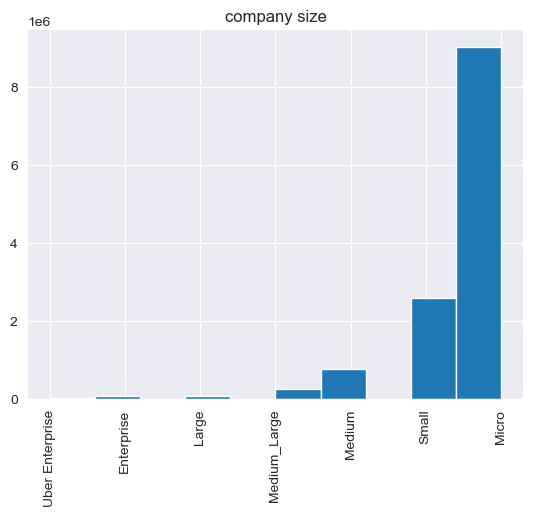

In [82]:
df['company_size'].hist()
plt.xticks(rotation=90)
plt.title('company size')
plt.show()

In [84]:
company_size = df.company_size.value_counts().rename_axis('unique_values').reset_index(name='counts')
company_size

,unique_values,counts
0,Micro,9014025
1,Small,2598963
2,Medium,758500
3,Medium_Large,248628
4,Large,77973
5,Enterprise,73995
6,Uber Enterprise,14916


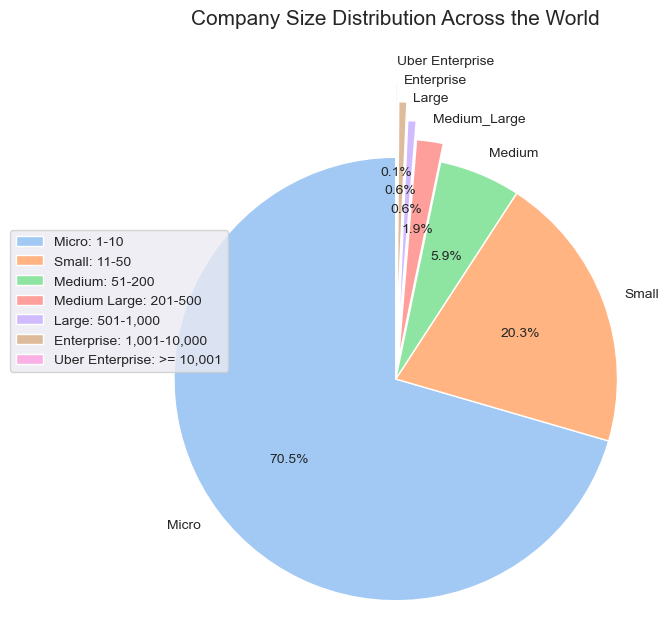

In [137]:
data = company_size.counts
labels = company_size.unique_values
colors = sns.color_palette('pastel')
annotation= ['Micro: 1-10','Small: 11-50', 'Medium: 51-200', 
             'Medium Large: 201-500', 'Large: 501-1,000', 
             'Enterprise: 1,001-10,000', 'Uber Enterprise: >= 10,001']

# Creating a user-defined function called explode

def explode(data, labels, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=False,
            colors=colors, startangle=90, radius=1.2, explode=(0, 0, 0, 0.1, 0.2, 0.3, 0.4))
    plt.legend(annotation, loc='lower left', bbox_to_anchor=(-0.35, .5), fontsize=10)

explode(data, labels, colors)
plt.title('Company Size Distribution Across the World', y=1.25, fontsize = 15)
plt.show()

### Insight 1:
* As we can see over 70% of the companies are micro sized companies having less then 10 employees. But these compnies most likely don't need a HR management system.
* There are only 0.1% are uber enterprise, these companies most like already have thier internal HR systems.
* Small, medium, medium large, and large companies are most likey to be thier taget.

In [138]:
df.isna().sum()

name                           66217
website                      3285050
industry                     2002314
size_range                         0
current_employee_estimate    5613574
total_employee_estimate            0
country                      3610983
locality                     4582416
region                       4008647
year_founded                 6900552
linkedin_url                       0
company_size                       0
dtype: int64

In [139]:
df.country.value_counts()

united states       3725697
united kingdom       946451
india                481406
brazil               327878
canada               314415
                     ...   
falkland islands          2
norfolk island            1
saint barthélemy          1
antarctica                1
pitcairn                  1
Name: country, Length: 244, dtype: int64

In [142]:
china=df[df.country=='china']
us=df[df.country=='united states']

In [143]:
china.company_size.value_counts()

Micro              38980
Small              29710
Medium             23451
Medium_Large        9306
Large               3359
Enterprise          2906
Uber Enterprise      420
Name: company_size, dtype: int64

this doesn't seem like a comprehensive data set for china

In [144]:
us.company_size.value_counts()

Micro              2867033
Small               612593
Medium              165907
Medium_Large         46286
Enterprise           15565
Large                15437
Uber Enterprise       2876
Name: company_size, dtype: int64

In [147]:
us.company_size.value_counts(normalize=True)

Micro              0.769529
Small              0.164424
Medium             0.044530
Medium_Large       0.012423
Enterprise         0.004178
Large              0.004143
Uber Enterprise    0.000772
Name: company_size, dtype: float64

In [148]:
us_company_size = us.company_size.value_counts().rename_axis('unique_values').reset_index(name='counts')
us_company_size

,unique_values,counts
0,Micro,2867033
1,Small,612593
2,Medium,165907
3,Medium_Large,46286
4,Enterprise,15565
5,Large,15437
6,Uber Enterprise,2876


Text(0.5, 1.25, 'Company Size Distribution Across the US')

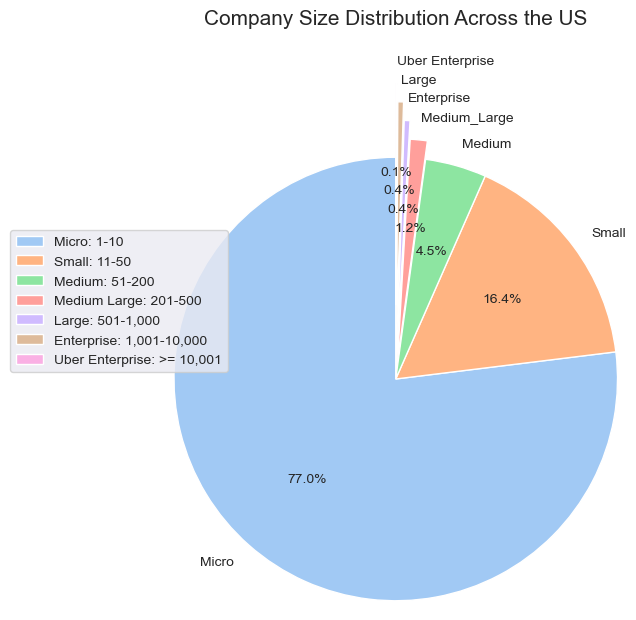

In [152]:
us_data = us_company_size.counts
us_labels = us_company_size.unique_values

# Creating a user-defined function called explode

def explode(data, labels, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=False,
            colors=colors, startangle=90, radius=1.2, explode=(0, 0, 0, 0.1, 0.2, 0.3, 0.4))
    plt.legend(annotation, loc='lower left', bbox_to_anchor=(-0.35, .5), fontsize=10)

explode(us_data, us_labels, colors)
plt.title('Company Size Distribution Across the US', y=1.25, fontsize = 15)

The US has the same distribution as the world

In [179]:
year_founded= df.year_founded.dropna().astype('int')

In [180]:
#number of companies founded in each year
year_founded.value_counts()

2015    333787
2016    318834
2014    312137
2013    287466
2017    285668
         ...  
1457         1
1702         1
1270         1
2103         1
1562         1
Name: year_founded, Length: 745, dtype: int64

In [182]:
yearly_count = year_founded.value_counts().rename_axis('year').reset_index(name='counts')
yearly_count

,year,counts
0,2015,333787
1,2016,318834
2,2014,312137
3,2013,287466
4,2017,285668
...,...,...
740,1457,1
741,1702,1
742,1270,1
743,2103,1


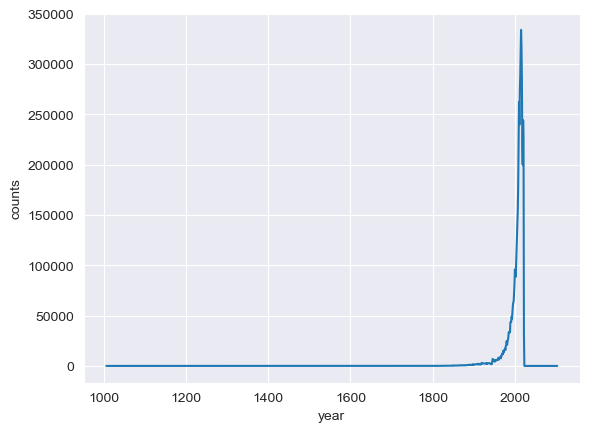

In [188]:
sns.lineplot(data=yearly_count, x="year", y="counts")
plt.show()

[(1800.0, 2022.0)]

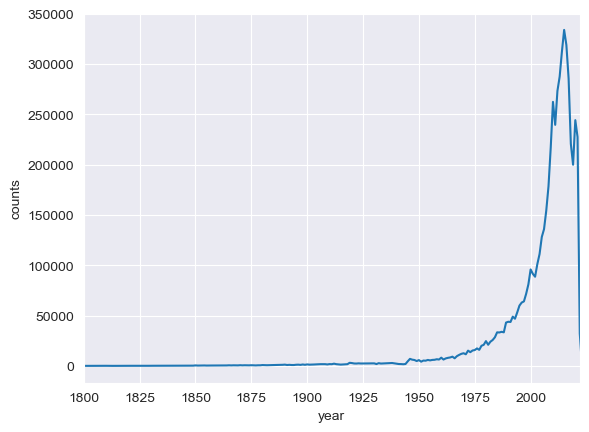

In [189]:
g= sns.lineplot(data=yearly_count, x="year", y="counts")
g.set(xlim=(1800, 2022))

[(1950.0, 2022.0)]

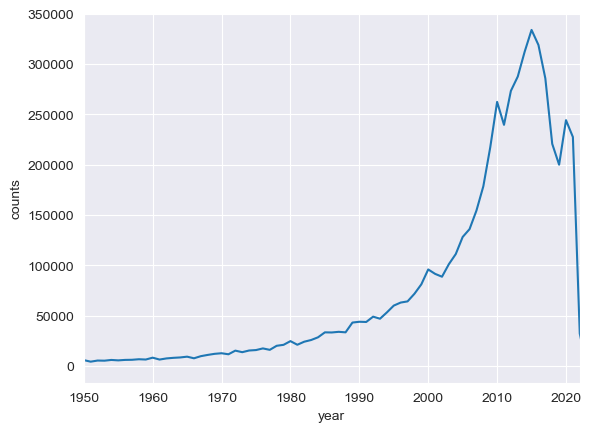

In [195]:
g= sns.lineplot(data=yearly_count, x="year", y="counts")
g.set(xlim=(1950, 2022))

### Insight 2:
* althought there are some companies are founded before 1950, but only few.
* most compnies are founded after 1980
* there are almost exponentail increse of companies from 2000 to 2010

In [ ]:
tech=df[df.industry.isin(['information technology and services', 'computer software', 'telecommunications'
                      'internet', 'consumer electronics', 'semiconductors', 'computer networking',
                      'computer hardware','computer games'])]
biotechnology= df[df.industry=='biotechnology']

In [206]:
tech_company_size = tech.company_size.value_counts().rename_axis('unique_values').reset_index(name='counts')
tech_company_size

,unique_values,counts
0,Micro,688666
1,Small,214751
2,Medium,60116
3,Medium_Large,15800
4,Large,4366
5,Enterprise,3630
6,Uber Enterprise,781


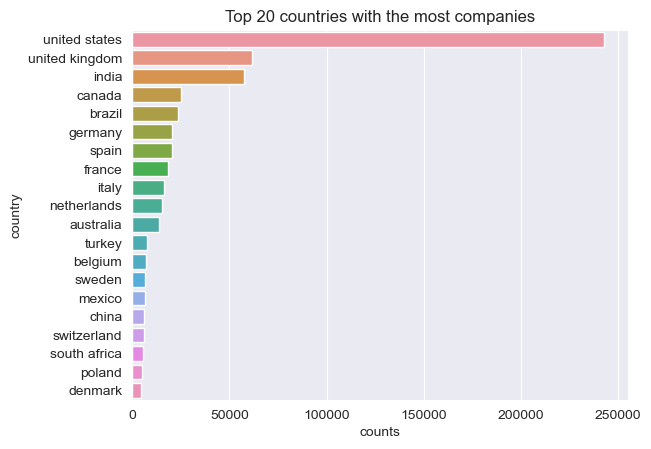

In [260]:
country = df.country.value_counts().rename_axis('country').reset_index(name='counts')
coutry_counts= country.sort_values(by='counts', ascending=False).head(20)
sns.barplot(data=tech_counts, x="counts", y="country", )
#plt.xticks( rotation='vertical')
plt.title('Top 20 countries with the most companies')
plt.show()

In [261]:
len(df[df.country=='china'])

108132

the number of companies in China doesn't sem right, the number should be much bigger

### Insight 3:
* the US have the largest number of companies
* but this data set clearly is not comprehensive one, since the bumber of Chinese companies are so off.
* the top 4 contries are english speaking countries, so develeoping the ysstem in English is a very safe route

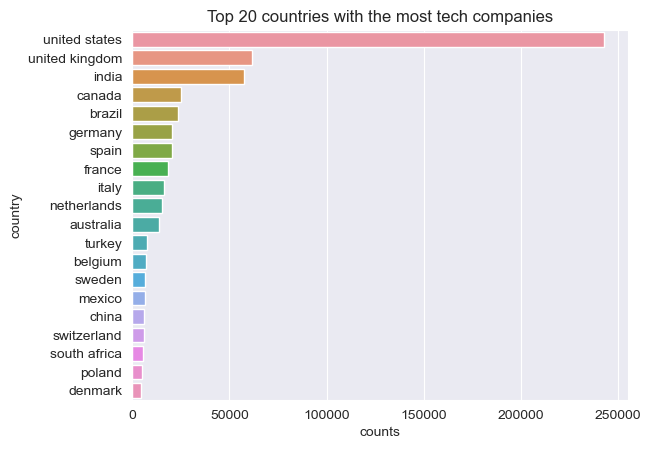

In [243]:
tech_country = tech.country.value_counts().rename_axis('country').reset_index(name='counts')
tech_counts= tech_country.sort_values(by='counts', ascending=False).head(20)
sns.barplot(data=tech_counts, x="counts", y="country", )
#plt.xticks( rotation='vertical')
plt.title('Top 20 countries with the most tech companies')
plt.show()

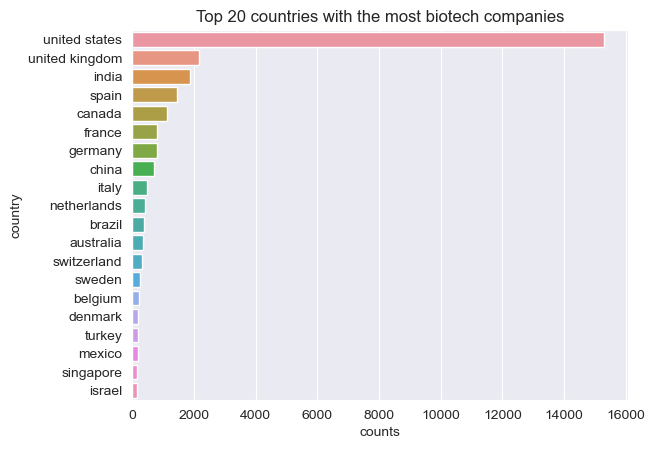

In [246]:
biotech_country = biotechnology.country.value_counts().rename_axis('country').reset_index(name='counts')
biotech_counts= biotech_country.sort_values(by='counts', ascending=False).head(20)
sns.barplot(data=biotech_counts, x="counts", y="country", )
plt.title('Top 20 countries with the most biotech companies')
plt.show()

In [208]:
biotechnology_company_size = biotechnology.company_size.value_counts().rename_axis('unique_values').reset_index(name='counts')
biotechnology_company_size

,unique_values,counts
0,Micro,25393
1,Small,8906
2,Medium,3161
3,Medium_Large,970
4,Large,297
5,Enterprise,223
6,Uber Enterprise,28


In [259]:
g=biotechnology[biotechnology.company_size=='Uber Enterprise'].groupby('country').count()
g

,name,website,industry,size_range,current_employee_estimate,total_employee_estimate,locality,region,year_founded,linkedin_url,company_size
country,,,,,,,,,,,
finland,1,1,1,1,0,1,1,1,1,1,1
india,3,3,3,3,1,3,2,3,2,3,3
indonesia,1,1,1,1,0,1,0,1,0,1,1
ireland,1,1,1,1,1,1,1,1,1,1,1
nigeria,1,0,1,1,0,1,1,1,0,1,1
portugal,1,0,1,1,0,1,1,1,1,1,1
spain,1,1,1,1,0,1,1,1,1,1,1
switzerland,2,2,2,2,2,2,2,2,2,2,2
united states,12,10,12,12,7,12,12,12,11,12,12


Text(0.5, 1.25, 'Company Size Distribution in Tech Sector')

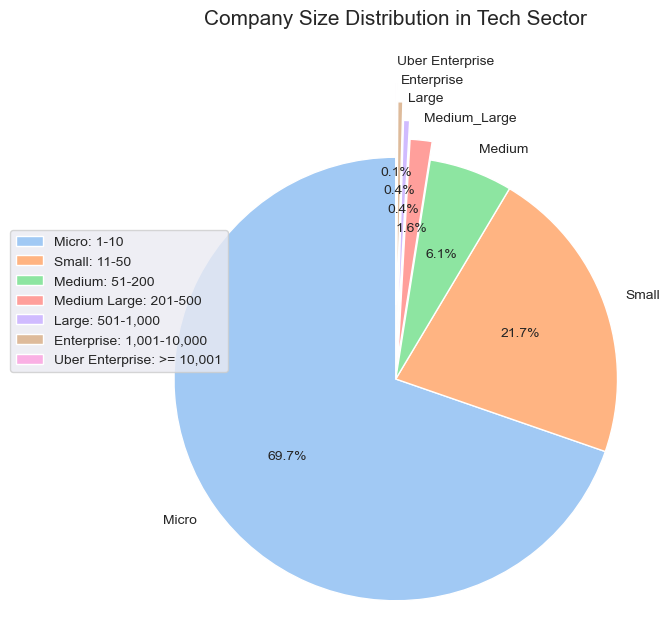

In [262]:
tech_data = tech_company_size.counts
tech_labels = tech_company_size.unique_values

# Creating a user-defined function called explode

def explode(data, labels, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=False,
            colors=colors, startangle=90, radius=1.2, explode=(0, 0, 0, 0.1, 0.2, 0.3, 0.4))
    plt.legend(annotation, loc='lower left', bbox_to_anchor=(-0.35, .5), fontsize=10)

explode(tech_data, tech_labels, colors)
plt.title('Company Size Distribution in Tech Sector', y=1.25, fontsize = 15)

Text(0.5, 1.25, 'Company Size Distribution in Biotech')

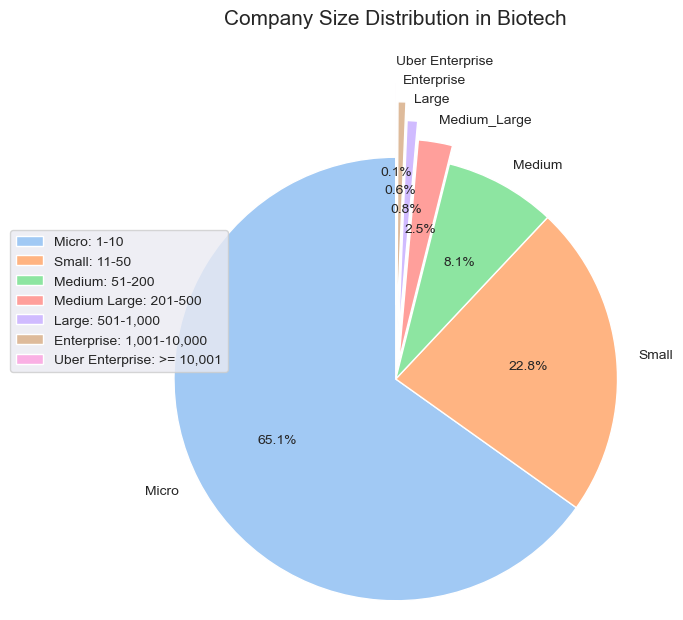

In [211]:
biotechnology_data = biotechnology_company_size.counts
biotechnology_labels = biotechnology_company_size.unique_values

# Creating a user-defined function called explode

def explode(data, labels, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=False,
            colors=colors, startangle=90, radius=1.2, explode=(0, 0, 0, 0.1, 0.2, 0.3, 0.4))
    plt.legend(annotation, loc='lower left', bbox_to_anchor=(-0.35, .5), fontsize=10)

explode(biotechnology_data, biotechnology_labels, colors)
plt.title('Company Size Distribution in Biotech', y=1.25, fontsize = 15)

### Insight 4:
* tech and biotech compnies has the same distibution, around 70% of micro compnies, and 0.1% under enterprises
* the US, UK and india have largest number of tech and biotech cmpnies, they are all English speaking companies

### Explore rehions within the US

In [263]:
us.region.nunique()


539

In [264]:
us.region.value_counts()

california           533759
texas                296047
new york             265829
florida              255904
illinois             152038
                      ...  
saint andrew              1
cordoba                   1
sodermanlands lan         1
kirklees                  1
kosicky                   1
Name: region, Length: 539, dtype: int64

In [267]:
region = us.region.value_counts().rename_axis('region').reset_index(name='counts')
region

,region,counts
0,california,533759
1,texas,296047
2,new york,265829
3,florida,255904
4,illinois,152038
...,...,...
534,saint andrew,1
535,cordoba,1
536,sodermanlands lan,1
537,kirklees,1


In [268]:
region.describe()

,counts
count,539.000000
mean,6814.191095
std,35260.086010
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,533759.000000


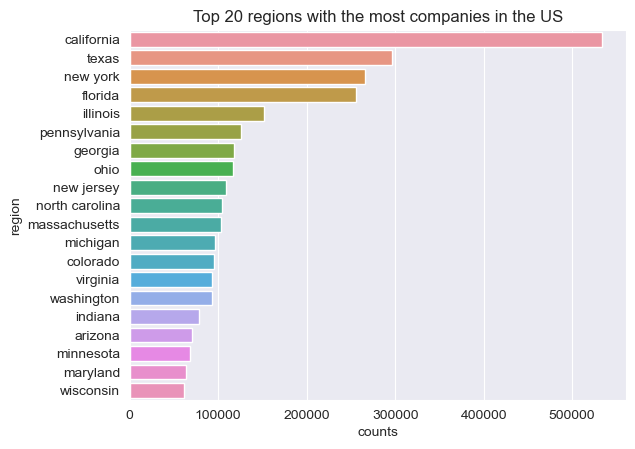

In [275]:
top_20=region.head(20)
sns.barplot(data=top_20, x="counts", y="region", )
plt.title('Top 20 regions with the most companies in the US')
plt.show()

### Insight 5:
* Califoria, Texas and New York have the largest number of compnies in the US
* so it make sense to hire and/or set up offices in those states.